In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append('../src')

In [4]:
from spaceoracle.models.estimators import ViTEstimatorV2

In [5]:
import anndata
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import seaborn as sns
import torch

In [6]:
adata_train = anndata.read_h5ad('../data/slideseq/day3_1.h5ad')
adata_test = anndata.read_h5ad('../data/slideseq/day3_2.h5ad')

In [7]:
n_top_genes = 4000
min_cells = 10
min_counts = 350

adata_train.var_names_make_unique()
adata_train.var["mt"] = adata_train.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata_train, qc_vars=["mt"], inplace=True)
sc.pp.filter_cells(adata_train, min_counts=min_counts)
adata_train = adata_train[adata_train.obs["pct_counts_mt"] < 20].copy()
adata_train = adata_train[:, ~adata_train.var["mt"]]
sc.pp.filter_genes(adata_train, min_cells=min_cells)

adata_train.layers["raw_count"] = adata_train.X

sc.pp.normalize_total(adata_train, inplace=True)
sc.pp.log1p(adata_train)
sc.pp.highly_variable_genes(
    adata_train, flavor="seurat", n_top_genes=n_top_genes)

adata_train = adata_train[:, adata_train.var.highly_variable]
adata_train

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


View of AnnData object with n_obs × n_vars = 9043 × 4000
    obs: 'cluster', 'rctd_cluster', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cluster_colors', 'rctd_cluster_colors', 'log1p', 'hvg'
    obsm: 'X_spatial', 'rctd_results', 'spatial'
    layers: 'raw_count'

In [8]:
adata_test.var_names_make_unique()
adata_test.var["mt"] = adata_test.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata_test, qc_vars=["mt"], inplace=True)
sc.pp.filter_cells(adata_test, min_counts=min_counts)
adata_test = adata_test[adata_test.obs["pct_counts_mt"] < 20].copy()
adata_test = adata_test[:, ~adata_test.var["mt"]]
sc.pp.filter_genes(adata_test, min_cells=min_cells)

adata_test.layers["raw_count"] = adata_test.X

sc.pp.normalize_total(adata_test, inplace=True)
sc.pp.log1p(adata_test)
sc.pp.highly_variable_genes(
    adata_test, flavor="seurat", n_top_genes=n_top_genes)

adata_test = adata_test[:, adata_test.var.highly_variable]
adata_test

View of AnnData object with n_obs × n_vars = 11411 × 4000
    obs: 'cluster', 'rctd_cluster', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    obsm: 'X_spatial', 'rctd_results', 'spatial'
    layers: 'raw_count'

In [9]:
np.intersect1d(adata_train.var_names, adata_test.var_names).__len__()

1725

In [10]:
adata_train = adata_train[:, adata_train.var_names.isin(np.intersect1d(adata_train.var_names, adata_test.var_names))]
adata_test = adata_test[:, adata_test.var_names.isin(np.intersect1d(adata_train.var_names, adata_test.var_names))]

adata_train, adata_test

(View of AnnData object with n_obs × n_vars = 9043 × 1725
     obs: 'cluster', 'rctd_cluster', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts'
     var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
     uns: 'cluster_colors', 'rctd_cluster_colors', 'log1p', 'hvg'
     obsm: 'X_spatial', 'rctd_results', 'spatial'
     layers: 'raw_count',
 View of AnnData object with n_obs × n_vars = 11411 × 1725
     obs: 'cluster', 'rctd_cluster', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',

In [11]:
np.intersect1d(adata_train.var_names, adata_test.var_names).__len__()

1725

In [12]:
estimator = ViTEstimatorV2(adata_train, target_gene='Cd74')

In [13]:
estimator.regulators, len(estimator.regulators)

(['Atf3',
  'Bcl11a',
  'Ebf1',
  'Ebf3',
  'Hivep1',
  'Klf7',
  'Mef2a',
  'Mef2c',
  'Pax5',
  'Pou2f2',
  'Rreb1',
  'Rxra',
  'Stat2',
  'Taf1',
  'Tcf7l2'],
 15)

In [16]:
estimator.fit(
    annot='rctd_cluster', 
    max_epochs=25, 
    learning_rate=3e-3, 
    spatial_dim=32,
    batch_size=16,
    init_betas='co',
    mode='train_test',
    rotate_maps=True,
    regularize=False,
    n_patches=2, n_heads=8, n_blocks=4, hidden_d=16
)

🌍️ Generating spatial maps: 100%|██████████| 9043/9043 [00:01<00:00, 4698.44it/s]


Training interrupted...


In [1]:
# plt.rcParams["figure.figsize"] = (8, 5)
# plt.rcParams['figure.dpi'] = 100
# plt.plot(estimator.losses)
# plt.xlabel('Epoch')
# plt.ylabel('mean squared error')
# plt.title('Validation loss')
# plt.show()

In [17]:
from spaceoracle.models.estimators import device

In [19]:
with torch.no_grad():
    betas = estimator.get_betas(
        np.array(adata_train.obsm['spatial']),
        np.array(adata_train.obs['rctd_cluster']),
    )

    y_pred = estimator.predict_y(
        estimator.model, 
        torch.from_numpy(betas).to(device), 
        torch.from_numpy(adata_train.to_df()[estimator.regulators].values).to(device)).cpu().numpy()

In [26]:
import pandas as pd

In [27]:
pd.DataFrame(betas)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.188631,-0.361515,0.044407,0.123219,-0.350706,0.049820,0.031676,0.174431,0.119866,0.136678,0.097330,-0.270273,-0.032100,0.017094,-0.049925,0.259632
1,0.929635,-0.150967,0.132656,0.150430,-0.058792,-0.022002,0.060014,0.068373,0.191430,0.240527,0.116841,-0.167462,-0.070409,0.039039,-0.022925,0.133009
2,0.721501,-0.011040,0.211251,0.164287,0.161601,-0.053254,0.075504,-0.005544,0.256553,0.320821,0.139922,-0.070248,-0.099122,0.069486,-0.016075,0.051424
3,1.193290,-0.367652,0.043673,0.120498,-0.359542,0.051258,0.030728,0.180031,0.119919,0.136089,0.098099,-0.268870,-0.030605,0.017852,-0.051285,0.263199
4,1.167160,-0.339037,0.051252,0.129161,-0.320386,0.044330,0.036076,0.159953,0.123512,0.143459,0.098484,-0.266366,-0.037534,0.017694,-0.046358,0.246722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9038,0.992109,-0.196551,0.111143,0.146758,-0.124740,-0.005998,0.054790,0.090236,0.171949,0.215732,0.113061,-0.197740,-0.062496,0.031480,-0.027834,0.160755
9039,1.101441,-0.281387,0.072580,0.138555,-0.242879,0.026039,0.044311,0.130238,0.139395,0.170229,0.104018,-0.244915,-0.047778,0.021756,-0.038579,0.212189
9040,0.260825,-0.133956,0.369687,0.184444,0.442639,0.188436,-0.075540,-0.170114,0.298100,0.521621,0.172881,-0.142058,0.013983,0.072577,-0.089110,0.053374
9041,0.546435,0.070826,0.288110,0.185982,0.333181,-0.038015,0.065564,-0.066109,0.303748,0.396300,0.182525,-0.033795,-0.107210,0.081411,-0.028791,0.005853


In [20]:
y_pred

array([1.3204466 , 0.9296346 , 0.8816526 , ..., 0.3472745 , 0.49785468,
       1.1778295 ], dtype=float32)

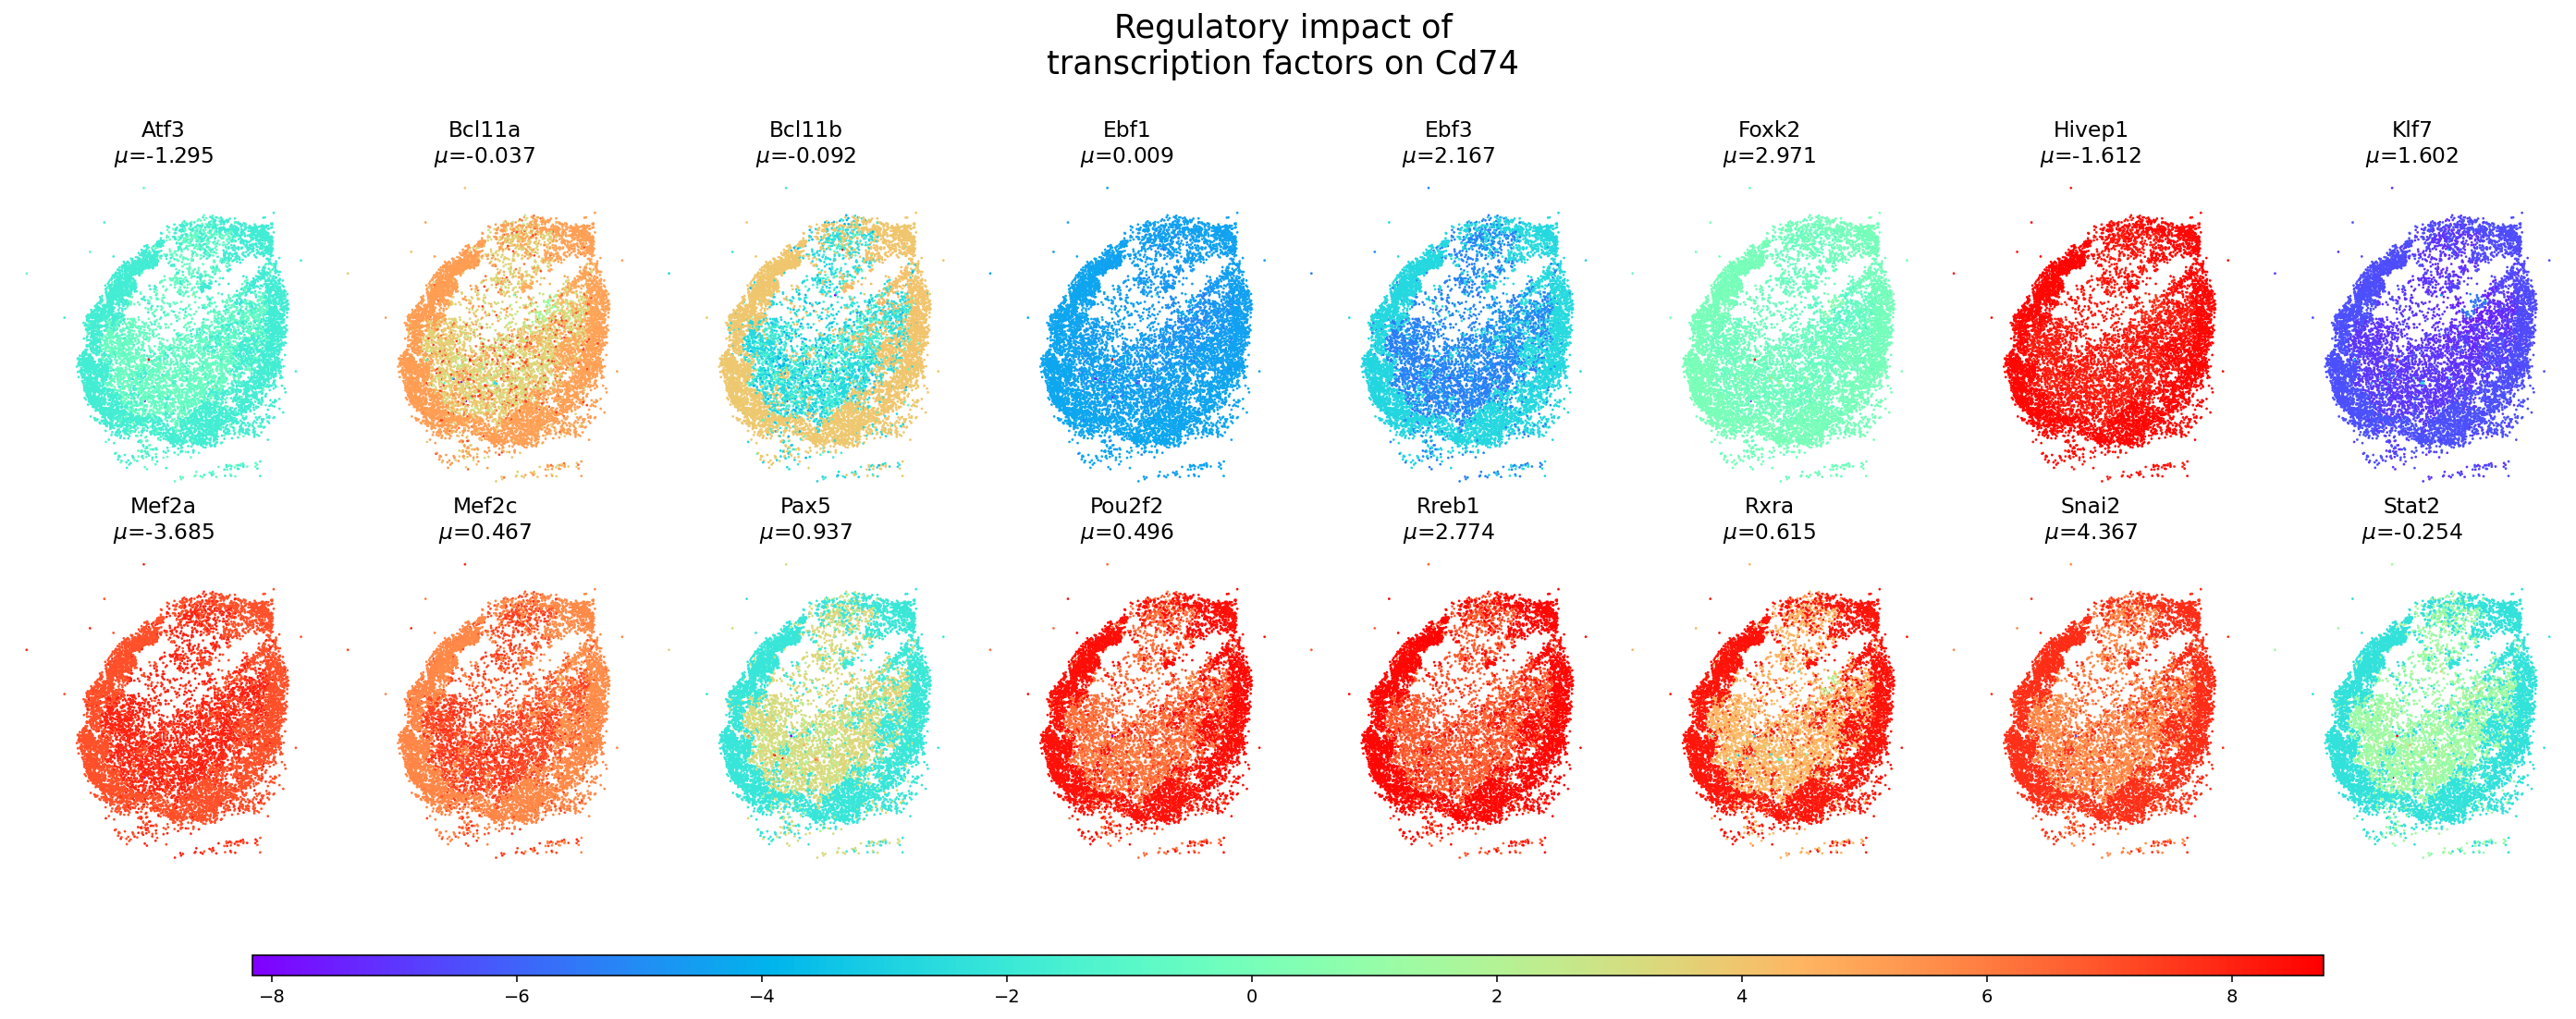

In [16]:
f, axs = plt.subplots(2, 7, figsize=(20, 8), dpi=140, sharex=True, sharey=True)
axs = axs.flatten()

scatter_plots = []

for i in range(len(axs)): 
    scatter = sns.scatterplot(x=adata_train.obsm['spatial'][:, 0], y=adata_train.obsm['spatial'][:, 1], 
                s=2, c=betas[:, i+1], cmap='rainbow', 
                ax=axs[i], edgecolor=None, linewidth=0, 
    )
    scatter_plots.append(scatter)

beta_means = list(betas.mean(0))
for ix, ax in enumerate(axs):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_title(f'{estimator.regulators[ix]}\n'+ r'$\mu$' + f'={beta_means[ix+1]:.3f}')
    ax.set_xticks([])
    ax.set_yticks([])
    
    
plt.tight_layout()
f.subplots_adjust(bottom=0.15)

# Add a colorbar
cbar_ax = f.add_axes([0.1, 0.05, 0.8, 0.02])
colorbar = f.colorbar(
    scatter_plots[0].collections[0], cax=cbar_ax, orientation='horizontal')


plt.suptitle(f'Regulatory impact of \ntranscription factors on {estimator.target_gene} ', fontsize=18)
plt.subplots_adjust(top=0.825)

plt.show()

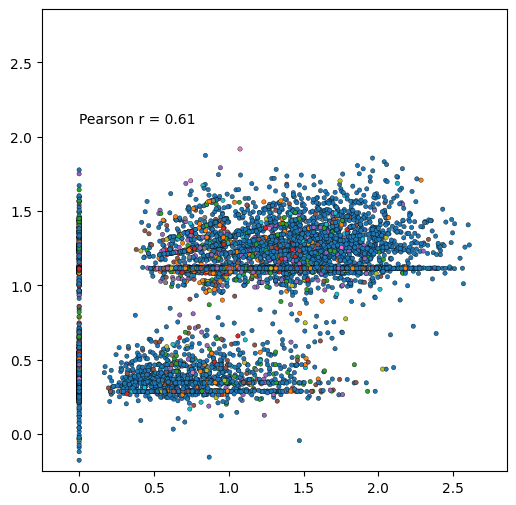

In [17]:
plt.rcParams["figure.figsize"] = (6, 6)
plt.rcParams['figure.dpi'] = 100
y = adata_train.to_df()[['Cd74']]
sns.scatterplot(
    x=y.values.reshape(-1), 
    y=y_pred.reshape(-1), s=10, 
    c=adata_train.obs.cluster.values[:], cmap='tab10', edgecolor='black', linewidth=0.25)
plt.xlim(y.values[:, :].min()-0.25, y.values[:, :].max()+0.25)
plt.ylim(y.values[:, :].min()-0.25, y.values[:, :].max()+0.25)

plt.show()

In [18]:
with torch.no_grad():
    betas_test = estimator.get_betas(
        np.array(adata_test.obsm['spatial']),
        np.array(adata_test.obs['rctd_cluster']),
    )
    
    y_pred = estimator.predict_y(
        estimator.model, 
        torch.from_numpy(betas_test).cuda(), 
        torch.from_numpy(adata_test.to_df()[estimator.regulators].values).cuda()).cpu().numpy()

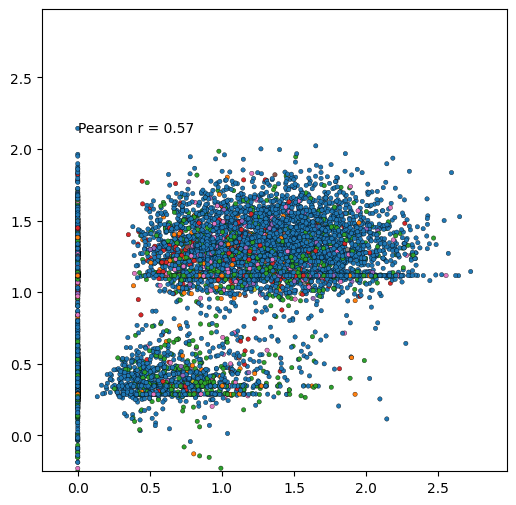

In [19]:
plt.rcParams["figure.figsize"] = (6, 6)
plt.rcParams['figure.dpi'] = 100
y = adata_test.to_df()[['Cd74']]
sns.scatterplot(
    x=y.values.reshape(-1), 
    y=y_pred.reshape(-1), s=10, 
    c=adata_test.obs.cluster.values[:], cmap='tab10', edgecolor='black', linewidth=0.25)
plt.xlim(y.values[:, :].min()-0.25, y.values[:, :].max()+0.25)
plt.ylim(y.values[:, :].min()-0.25, y.values[:, :].max()+0.25)

corr, _ = pearsonr(y.values.reshape(-1), y_pred.reshape(-1))
plt.text(
    x=y.values.min(), 
    y=y_pred.max()+0.05, 
    s=f'Pearson r = {corr:.2f}', 
    fontsize=10, 
    fontname='DejaVu Sans',
    ha='left',
    va='top'
)
plt.show()


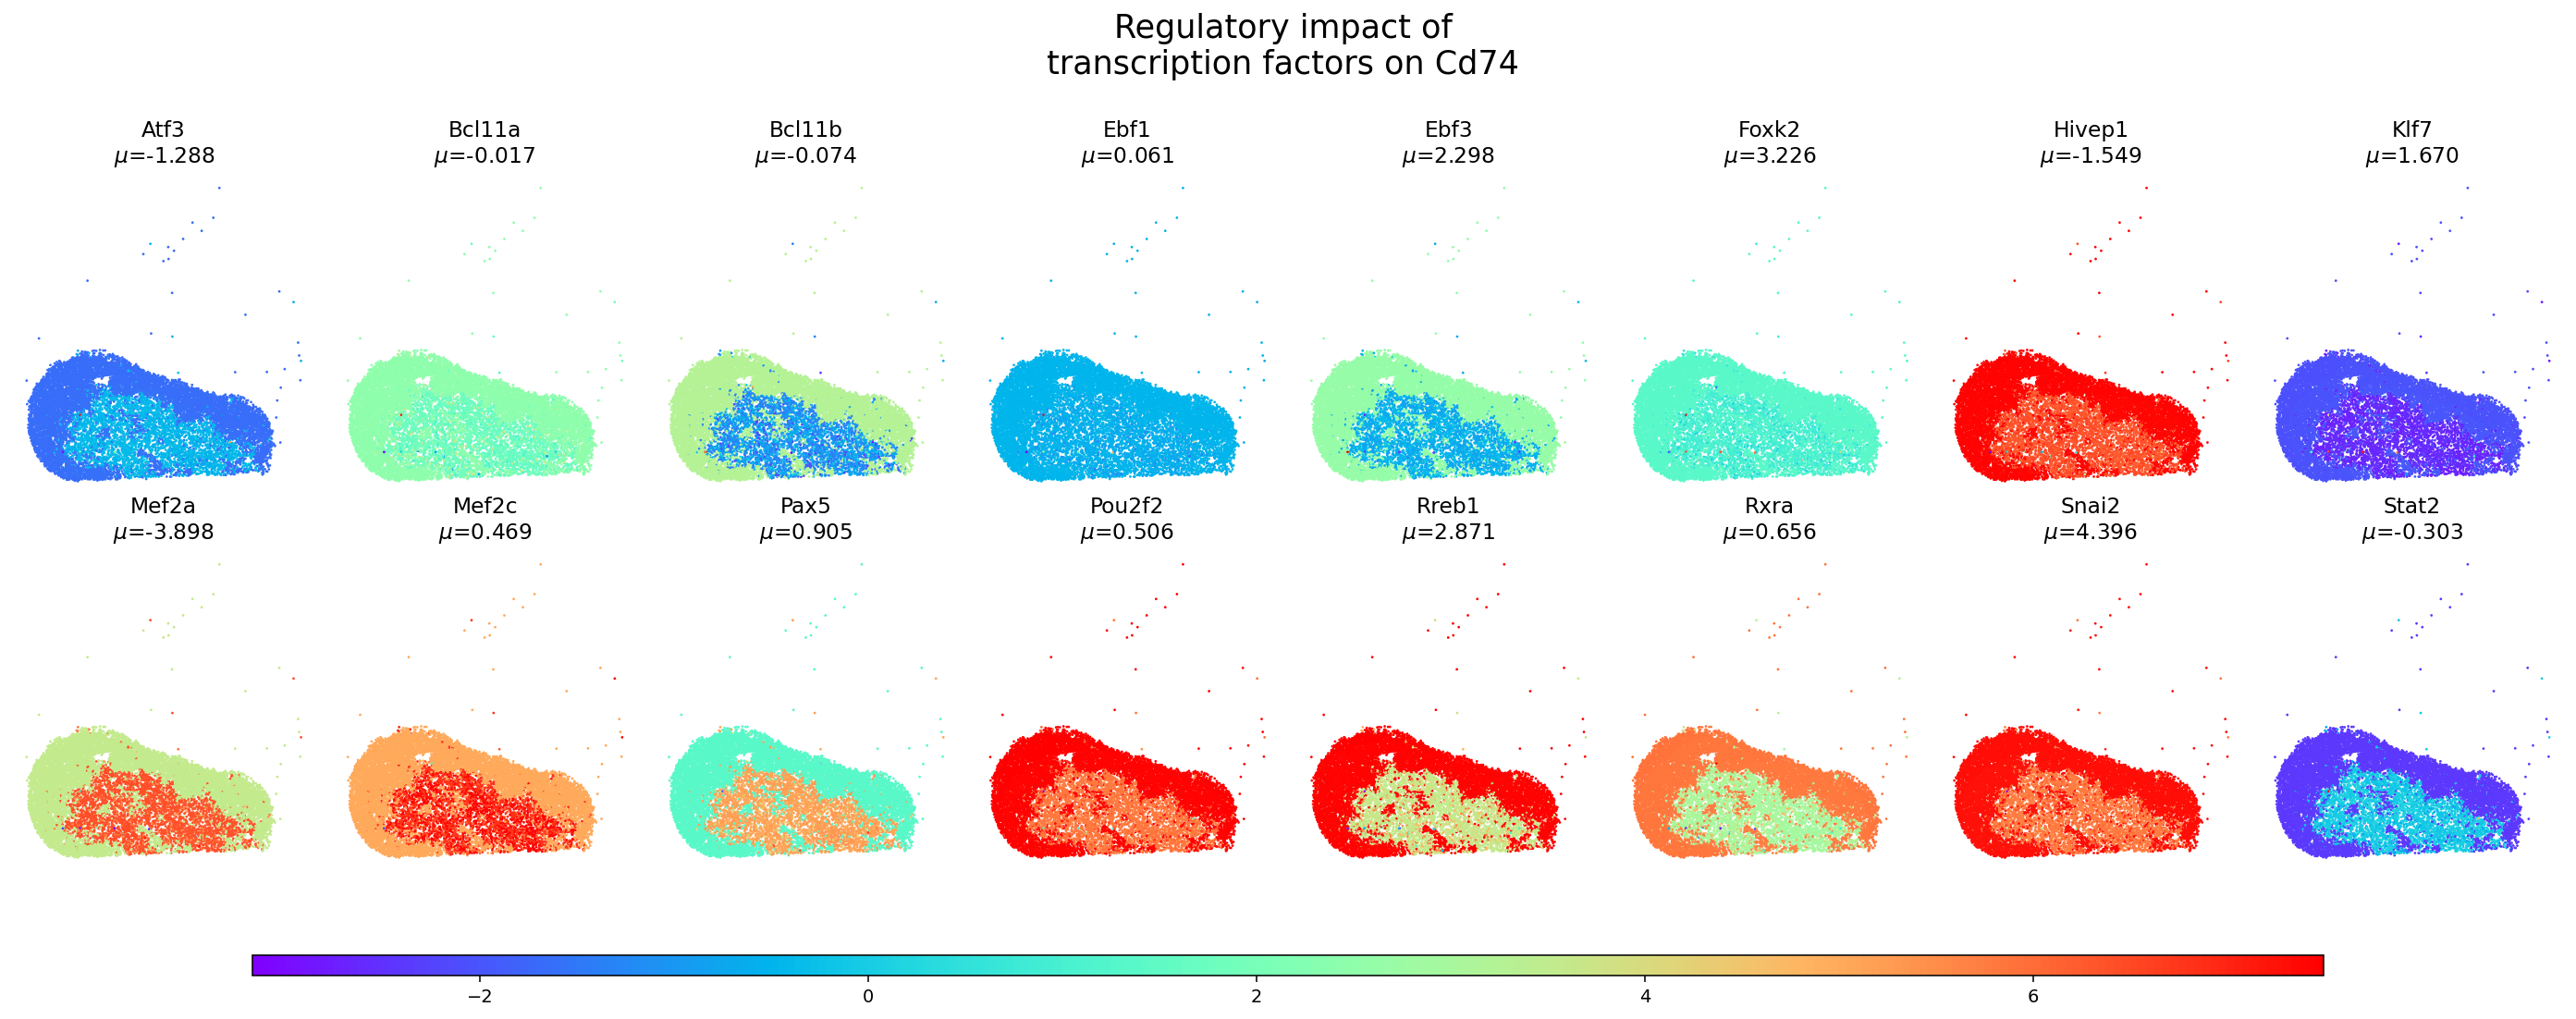

In [20]:
f, axs = plt.subplots(2, 7, figsize=(20, 8), dpi=140, sharex=True, sharey=True)
axs = axs.flatten()

scatter_plots = []

for i in range(len(axs)): 
    scatter = sns.scatterplot(x=adata_test.obsm['spatial'][:, 0], y=adata_test.obsm['spatial'][:, 1], 
                s=2, c=betas_test[:, i+1], cmap='rainbow', 
                ax=axs[i], edgecolor=None, linewidth=0, 
    )
    scatter_plots.append(scatter)

beta_means = list(betas_test.mean(0))
for ix, ax in enumerate(axs):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_title(f'{estimator.regulators[ix]}\n'+ r'$\mu$' + f'={beta_means[ix+1]:.3f}')
    ax.set_xticks([])
    ax.set_yticks([])
    
    
plt.tight_layout()
f.subplots_adjust(bottom=0.15)

# Add a colorbar
cbar_ax = f.add_axes([0.1, 0.05, 0.8, 0.02])
colorbar = f.colorbar(
    scatter_plots[0].collections[0], cax=cbar_ax, orientation='horizontal')


plt.suptitle(f'Regulatory impact of \ntranscription factors on {estimator.target_gene} ', fontsize=18)
plt.subplots_adjust(top=0.825)

plt.show()

In [21]:
# Examine attention weights

train_dataloader, valid_dataloader = estimator._build_dataloaders_from_adata(
    estimator.adata.copy(), estimator.target_gene, estimator.regulators, batch_size=1, mode='train', 
    rotate_maps=False, annot='rctd_cluster', spatial_dim=64)


for batch_spatial, batch_x, batch_y, batch_labels in valid_dataloader:
    break

In [22]:
att_weights = estimator.model.get_att_weights(batch_spatial.to('cuda'))
att_weights[0][0].shape # (nblocks, batch, nheads, patch, patch)

torch.Size([2, 257, 257])

In [23]:
n_blocks

2

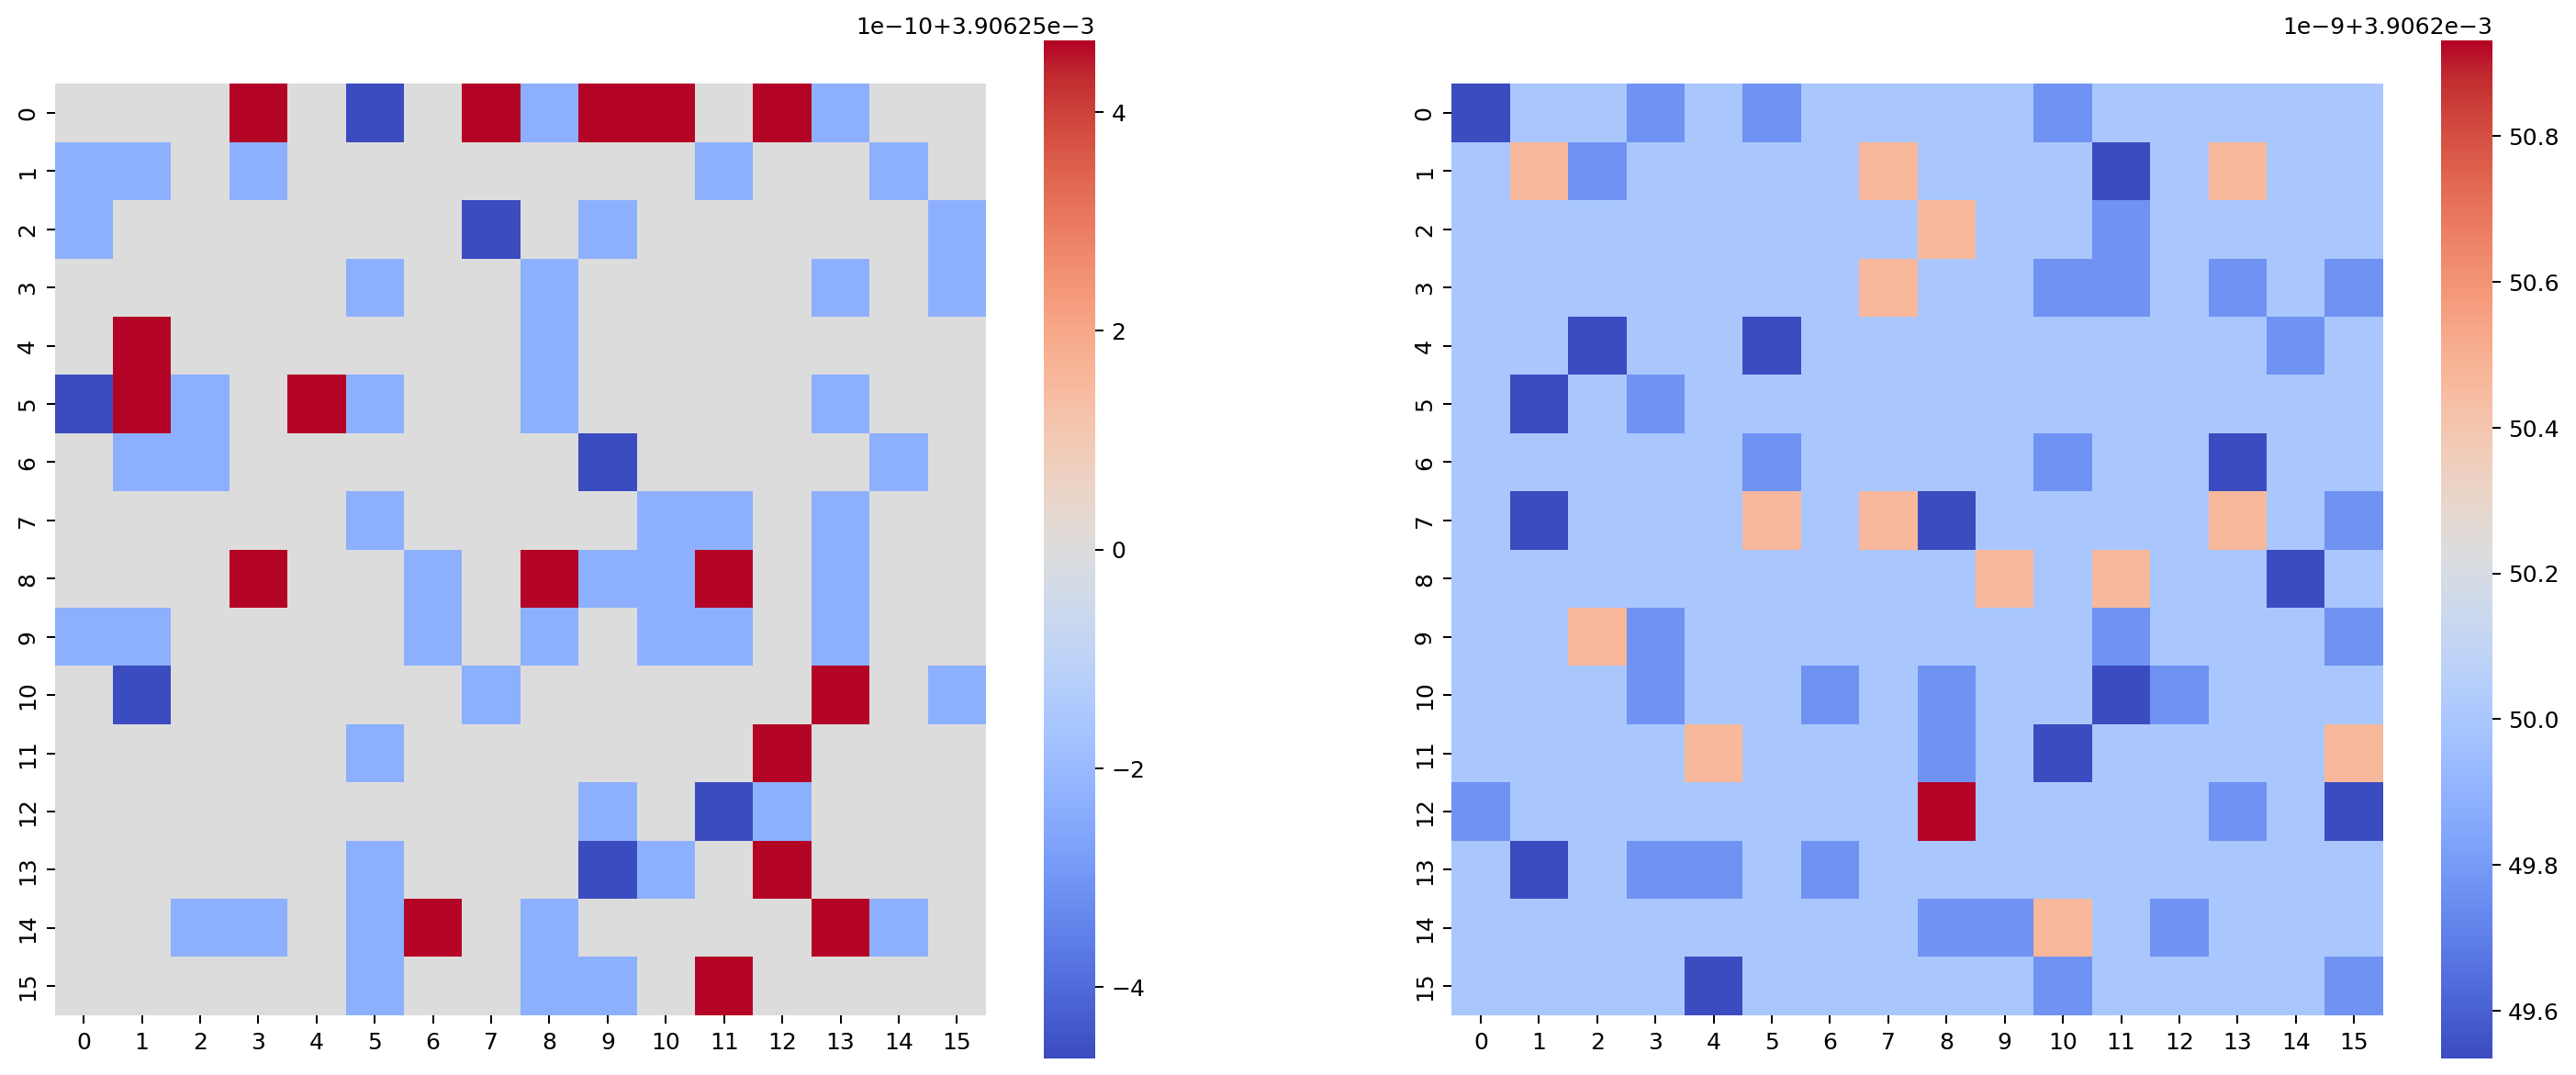

In [24]:
n_blocks = estimator.model.n_blocks
fig, axs = plt.subplots(ncols=n_blocks, figsize=(20, 8))

# (nblocks, batch, nheads, patch, patch)

for i in range(n_blocks):
    sns.heatmap(att_weights[1][0][i].mean(dim=1).squeeze(0).detach().cpu().numpy()[1:].reshape(16,16), 
                ax=axs[i], cmap='coolwarm', square=True)

<AxesSubplot: >

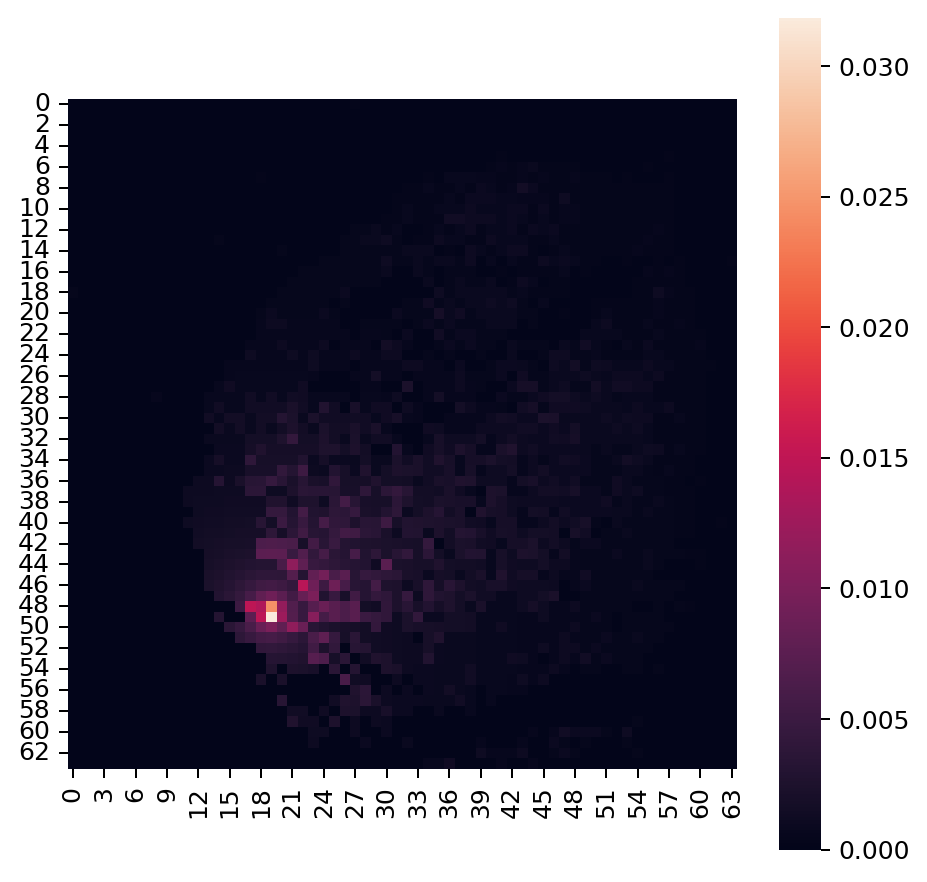

In [25]:
sns.heatmap(batch_spatial.sum(axis=1).squeeze().detach().cpu().numpy(), square=True)